# Исследование данных о продажах компьютерных игр

Допустим, мы работаем в интернет-магазине "Стримчик", который продает компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр до 2016 года, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

In [1]:
import pandas as pd # загрузим необходимые библиотеки для работы с табличными данными
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st

### Откроем файл с данными и изучим общую информацию

In [2]:
try:
    df = pd.read_csv('games.csv') # откроем файл
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head() # выведем первые 5 строк датафрейма на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Названия столбцов приведем к нижнему регистру

In [4]:
df.columns = df.columns.str.lower() 
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
df.info() # выведем на экран общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных есть несколько столбцов с пропусками, особенно много пропусков в столбцах с рейтингами. Кроме того, необходимо поменять типы данных в столбцах "year_of_release" и "user_score".

### Подготовим данные к анализу

#### Исследуем столбцы на наличие пропусков

In [6]:
df[df['year_of_release'].isna()] # выведем строки с играми, дата релиза которых неизвестна

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
df[df['year_of_release'].isna()]['name'].unique() # изучим игры с пропусками в дате релиза

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

Изучив игры с пропусками в дате выхода, стало известно, что даты релиза данных игр - более чем 10-летней давности(примерно от 1977 года до 2007). Данный период времени не актуален для нашего анализа. Следовательно, строки с такими играми можно удалить.\
Кроме того, удалим по 2 строки в столбцах 'name' и 'genre'. Строки с играми без названия непригодны к анализу.

In [8]:
df = df.dropna(subset=['year_of_release','name','genre'])

In [9]:
df['year_of_release'].isna().sum()

0

Перейдем к столбцу 'user_score'. Тип столбца - *object*, из-за того, что в столбце присутствуют значения tbd. Аббревиатура tbd расшифровывается как *to be determined*, то есть *ещё не определен*.Не определен, значит, отсутствует. Вычислить такой рейтинг самостоятельно не получится; удалить такие строки тоже нельзя, так как их достаточно много. Заменим tbd на NaN, тогда мы сможем поменять тип столбца с *object* на *float*.  

In [10]:
df[df['user_score']=='tbd'] # посмотрим на строки с аббревиатурой "tbd"

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [11]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN) # заменяем 'tbd' на значения NaN

In [12]:
df['user_score'].sort_values().unique() # проверим, осталась ли аббревиатура 'tbd' после замены:

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [13]:
df['user_score'].isna().sum() # посчитаем итоговое число пропусков в столбце "user_score"

8981

Данные пропуски некорректно заполнять средним, это сильно повлияет на общий анализ данных; удалять тоже нельзя: строк с пропусками больше 50%. Данные с оценками пользователей понадобятся нам в шаге проверки гипотез, на том же шаге и удалим строки с пропусками, для корректного выполнения ttest. А на данном этапе оставим столбец без изменений.

Далее, рассмотрим столбец с наибольшим числом пропусков:"critic_score"

In [14]:
df['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Особенных выделяющихся значений в этом столбце не обнаружено. Строки с пропусками удалять или изменять не станем, их слишком много, заменять средним некорректно.

Перейдем к столбцу "rating".

In [15]:
df['rating'].sort_values().unique() # выведем на экран все уникальные названия рейтингов игр

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

При исследовании данных видов рейтингов оказалось, что рейтинг "E" (everyone-для всех с 6 лет) и рейтинг "K-A"(Kids to Adults) - один и тот же рейтинг. Первоначально он назывался "K-A", затем название сменилось на "E". Заменим в столбце "rating" значения "K-A" на "E".

In [16]:
df['rating'] = df['rating'].replace('K-A', 'E')

In [17]:
df['rating'].unique() # проверим как сработала замена

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Пропуски в столбце 'rating' заполним 'unknown', чтобы не потерять данные при анализе. На тип данных это не повлияет

In [18]:
df['rating'] = df['rating'].fillna('unknown')

In [19]:
df['rating'].isna().sum() # проверим, все ли пропуски заполнились

0

In [20]:
df.groupby('rating')['name'].count() # посмотрим на частотность использования категорий рейтингов

rating
AO            1
E          3924
E10+       1393
EC            8
M          1536
RP            1
T          2905
unknown    6676
Name: name, dtype: int64

In [21]:
df = df.query('rating not in ["AO","EC","RP"]') # удалим категории, представленные незначительным количеством игр

In [22]:
df.groupby('rating')['name'].count() # обновленный список категорий

rating
E          3924
E10+       1393
M          1536
T          2905
unknown    6676
Name: name, dtype: int64

In [23]:
df['genre'].value_counts() # просмотрим столбец с жанрами

Action          3305
Sports          2306
Misc            1716
Role-Playing    1481
Shooter         1296
Adventure       1291
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         672
Puzzle           569
Name: genre, dtype: int64

In [24]:
df['platform'].value_counts() # просмотрим столбец 'platform'

PS2     2126
DS      2119
PS3     1306
Wii     1284
X360    1232
PSP     1193
PS      1190
PC       954
GBA      811
XB       802
GC       541
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

#### Преобразуем данные в нужные типы

In [25]:
df = df.astype({'year_of_release':'int','user_score':'float64'})

In [26]:
df.info() # проверим, правильно ли поменялись типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16434 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16434 non-null  object 
 1   platform         16434 non-null  object 
 2   year_of_release  16434 non-null  int64  
 3   genre            16434 non-null  object 
 4   na_sales         16434 non-null  float64
 5   eu_sales         16434 non-null  float64
 6   jp_sales         16434 non-null  float64
 7   other_sales      16434 non-null  float64
 8   critic_score     7981 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           16434 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Проверим данные на наличие дубликатов

In [27]:
df.duplicated().sum() 

0

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [28]:
 # добавим в таблицу столбец с суммарными продажами
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

### Проведем исследовательский анализ данных

#### Построим распределение количества выпущенных игр с 1980 по 2016 гг

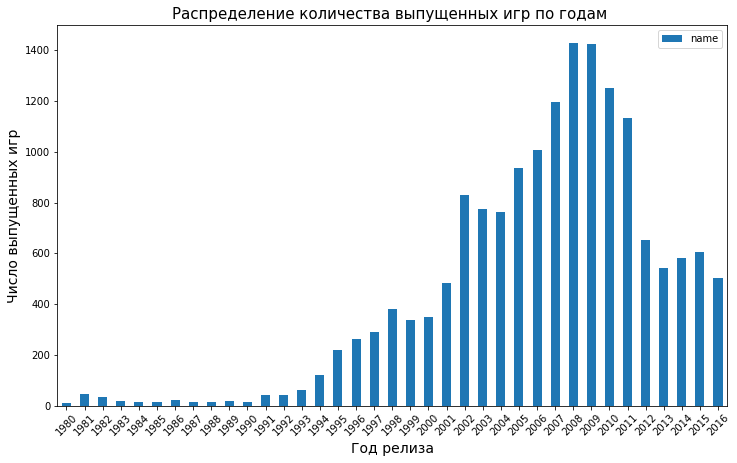

In [29]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar',rot=45, figsize=(12,7));
plt.title('Распределение количества выпущенных игр по годам ',fontsize=15)
plt.ylabel('Число выпущенных игр', fontsize=14)
plt.xlabel('Год релиза', fontsize=14);

Из графика следует: с 2002 по 2011 гг выпускалось наибольшее количесвто игр, затем число производимых игр пошло на спад. Для нашего анализа необходим временной период, отражающий тенденцию количества производимых игр за последние годы. 

#### Посмотрим, как менялись продажи по платформам

In [30]:
df_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
df_platform

platform
PS2     1233.32
X360     961.24
PS3      931.34
Wii      890.52
DS       802.13
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.63
GB       254.43
NES      251.05
XB       249.61
N64      218.01
SNES     200.04
GC       196.62
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [31]:
# выделим самые прибыльные платформы
df_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10) 

In [32]:
df.query('platform in @df_platform.index').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN


Странный выброс с продажами игр на платформе DS за 1985 год - сама платформа была выпущена в 2004 году. Удалим аномалию. 

In [33]:
df = df.loc[~((df['platform']=='DS') & (df['year_of_release']==1985))]

Построим график распределения продаж игр на платформах по годам

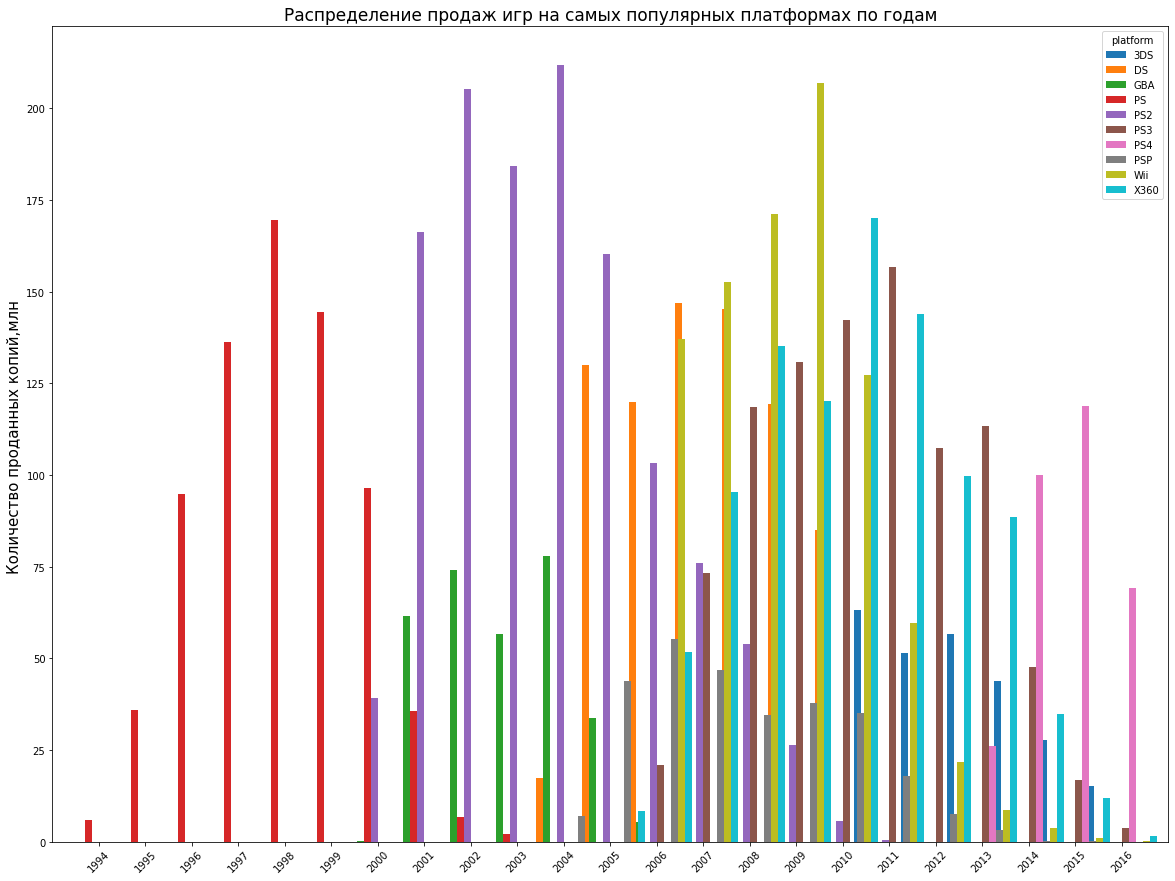

In [34]:
df.query('platform in @df_platform.index').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(kind='bar',figsize=(20,15), width=1.5,rot=45)
plt.title('Распределение продаж игр на самых популярных платформах по годам', fontsize=17)
plt.ylabel('Количество проданных копий,млн ', fontsize=15)
plt.xlabel('');

Исходя из предыдущих исследований, за актуальный период будем считать данные за **2015 -2016** годы. Данный период характерен тенденцией к спаду производства и продаж видеоигр, а также существованием на рынке определенных игровых платформ.

Составим рейтинг продаж по платформам за 2015-2016 годы и отберем самые продаваемые платформы. 

In [35]:
df_good_year = df.query('year_of_release>=2015')
df_platform = df_good_year.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(8) 
df_platform

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Name: total_sales, dtype: float64

In [36]:
df.query('platform in @df_platform.index').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
year_of_release,,,,,,,,
1985,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,12.87,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,4.22,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,10.58,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,11.27,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,3.26,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,4.74,NaN,NaN,NaN,NaN,NaN,NaN


Сводная таблица и график наглядно показывают цикл "жизни" платформ. **Средний срок существования платформы составляет 10-12 лет.
Срок исчезновения старых и одновременно появления новых платформ составляет 4-6 лет.**

In [37]:
df_good = df.query('platform in @df_platform.index').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
df_good.columns = ['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'WiiU', 'X360', 'XOne']
df_good

,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
year_of_release,,,,,,,,
1985,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,12.87,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,4.22,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,10.58,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,11.27,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,3.26,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,4.74,NaN,NaN,NaN,NaN,NaN,NaN


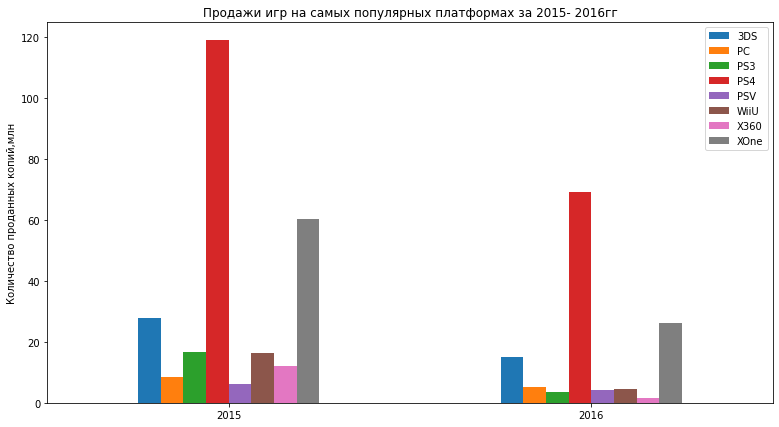

In [38]:
df_good.query('year_of_release>=2015').plot(kind='bar',rot=0, figsize=(13,7))
plt.title('Продажи игр на самых популярных платформах за 2015- 2016гг')
plt.ylabel('Количество проданных копий,млн')
plt.xlabel('');

**Вывод:** Потенциально прибыльными платформами в 2017 году будем считать **3DS, PS4, PC и XOne**. Платформам PS3 и X360  в 2016 году исполнилось  11 и 12 лет соответственно, такие платформы находятся в конце своего "жизненного" цикла и не будут приносить прибыль в 2017 году. Игры на PC приносят хоть и небольшую прибыль, но продажи стабильны из года в год.

#### Сгруппируем продажи игр по платформам за 2015 и 2016 годы и построим диаграмму размаха.

In [39]:
df_good_year = df.query('year_of_release>=2015')
df_good_year.pivot_table(index='name',columns='platform',values='total_sales')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,
Beyblade Burst,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12-Sai. Koisuru Diary,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS Classic Collection,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
Yuusha Shisu.,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN
Zero Escape: Zero Time Dilemma,0.08,NaN,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN
Zettai Kaikyuu Gakuen: Eden with Roses and Phantasm,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN


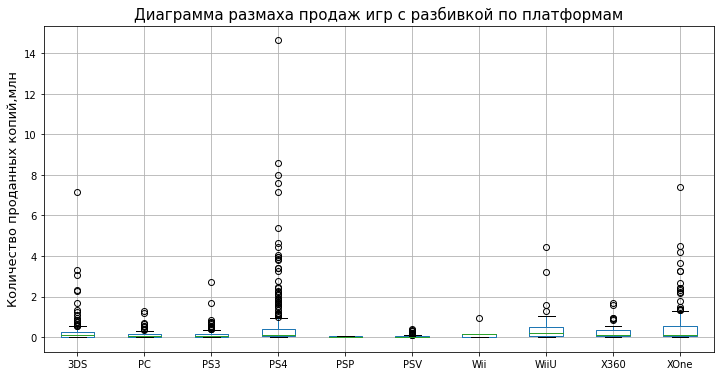

In [40]:
df_good_year.pivot_table(index='name',columns='platform',values='total_sales').boxplot(figsize=(12,6))
plt.ylabel('Количество проданных копий,млн', fontsize=13)
plt.title('Диаграмма размаха продаж игр с разбивкой по платформам',fontsize=15);

In [41]:
df_good_year.pivot_table(index='name',columns='platform',values='total_sales').describe()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,132.000000,104.000000,111.000000,301.000000,3.000000,195.000000,5.000000,42.00000,48.000000,167.000000
mean,0.325152,0.132404,0.183964,0.625083,0.040000,0.053846,0.264000,0.49881,0.280833,0.516707
std,0.798620,0.209449,0.342696,1.457063,0.034641,0.063669,0.390487,0.85024,0.381207,0.965940
min,0.010000,0.010000,0.010000,0.010000,0.020000,0.010000,0.010000,0.01000,0.010000,0.010000
25%,0.030000,0.020000,0.020000,0.050000,0.020000,0.020000,0.030000,0.05000,0.040000,0.035000
50%,0.090000,0.050000,0.060000,0.120000,0.020000,0.030000,0.150000,0.21500,0.110000,0.130000
75%,0.232500,0.142500,0.160000,0.420000,0.050000,0.060000,0.180000,0.51750,0.352500,0.555000
max,7.140000,1.280000,2.700000,14.630000,0.080000,0.410000,0.950000,4.44000,1.700000,7.390000


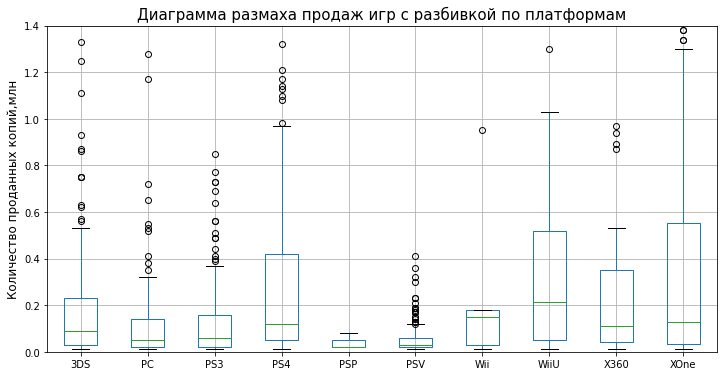

In [42]:
df_good_year.pivot_table(index='name',columns='platform',values='total_sales').boxplot(figsize=(12,6))
plt.title('Диаграмма размаха продаж игр с разбивкой по платформам', fontsize=15)
plt.ylim(0,1.4);
plt.ylabel('Количество проданных копий,млн', fontsize=12);

Видим, что на платформах медианы продаж различаются. Выделим платформы PS4, WiiU, XOne - платформы с наиболее длинным рядом стабильно продающихся игр. 

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

##### Построим диаграмму рассеяния и найдем коэффициент корреляции между оценками критиков, пользователей и продажами игр на платформе PS4 

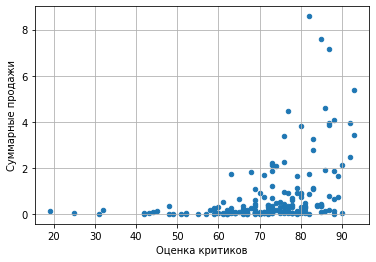

In [43]:
df_good_year.query('platform=="PS4"').plot(x='critic_score', y='total_sales', kind = 'scatter', grid=True, title='')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка критиков');

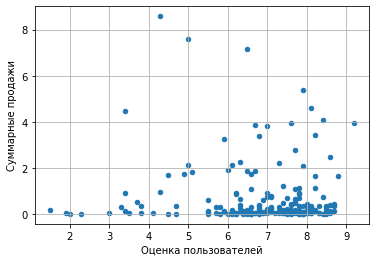

In [44]:
df_good_year.query('platform=="PS4"').plot(x='user_score', y='total_sales', kind = 'scatter', grid=True, title='')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка пользователей');

In [45]:
df_good_year[df_good_year['platform']=="PS4"]['user_score'].corr(df['total_sales']) 

-0.05973845712638215

In [46]:
df_good_year[df_good_year['platform']=="PS4"]['critic_score'].corr(df['total_sales'])

0.3928485555130601

Вывод: оценки пользователей не влияют на продажи игр на данной платформе, корреляция практически нулевая. Либо между оценками пользователей и продажами существует более сложная нелинейная связь.\
Между оценками критиков и продажами существует умеренная линейная зависимость.  

##### Сопоставим данные исследования с данными по другим потенциально прибыльным платформам:

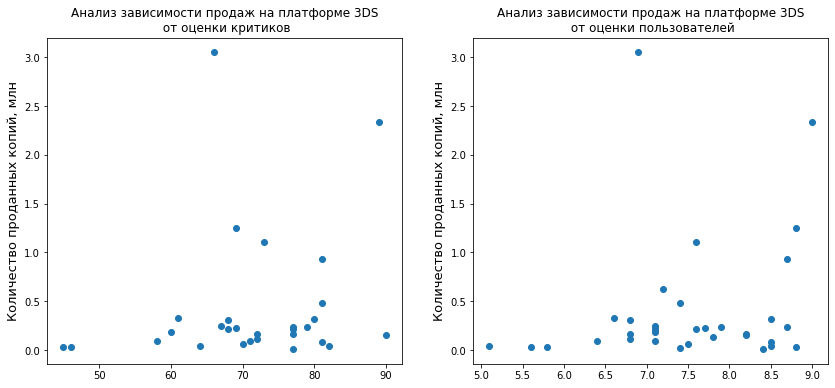

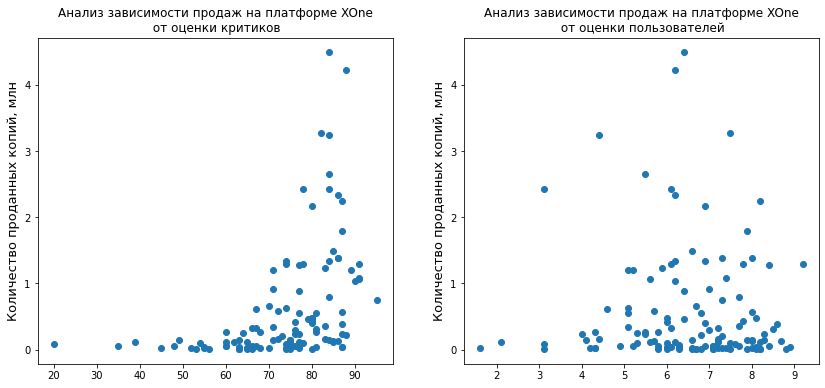

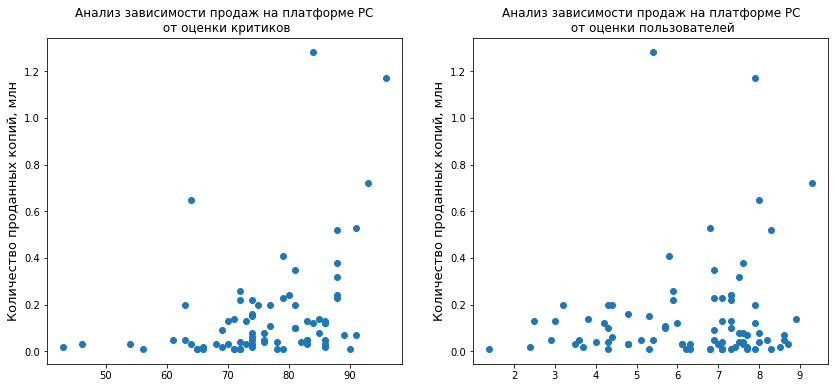

In [47]:
for name_platform in ['3DS','XOne','PC']:
    x_critic = df_good_year[df_good_year['platform']==name_platform]['critic_score']
    y_critic = df_good_year[df_good_year['platform']==name_platform]['total_sales']
    
    x_user = df_good_year[df_good_year['platform']==name_platform]['user_score']
    y_user = df_good_year[df_good_year['platform']==name_platform]['total_sales']
    
    fig = plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(x_critic,y_critic)
    plt.title('Анализ зависимости продаж на платформе ' + name_platform +'\n от оценки критиков')
    plt.ylabel('Количество проданных копий, млн',fontsize=13)
    plt.subplot(1, 2, 2)
    plt.scatter(x_user,y_user)
    plt.title('Анализ зависимости продаж на платформе ' + name_platform +'\n от оценки пользователей')
    plt.ylabel('Количество проданных копий, млн',fontsize=13)

    plt.show()

In [70]:
for name in ['3DS','XOne','PC']:
    print(name,':',df_good_year[df_good_year['platform']==name]['user_score'].corr(df['total_sales']))

3DS : 0.19879627008102982
XOne : -0.04146733387366271
PC : 0.15038053045029076


Согласно графикам и коэффициентам корреляции, для всех платформ связи между отзывами пользователей и продажами не наблюдается (малая связь).

In [71]:
for name in ['3DS','XOne','PC']:
    print(name,':',df_good_year[df_good_year['platform']==name]['critic_score'].corr(df['total_sales']))

3DS : 0.17757455046092874
XOne : 0.43088874582136805
PC : 0.3773317477241351


По платформам XOne и PC: между отзывами критиков и продажами наблюдается умеренная(средняя) связь. Вероятно, пользователи сильнее прислушиваются к отзывам критиков, нежели к отзывам пользователей. \
По платформе 3DS:связи между отзывами критиков и продажами не наблюдается (малая связь). 

#### Посмотрим на распределение игр по жанрам

In [50]:
df.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          3304
Sports          2306
Misc            1716
Role-Playing    1481
Shooter         1296
Adventure       1291
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         672
Puzzle           569
Name: name, dtype: int64

Самыми распространенными игровыми жанрами являются Action и Sports, наименее распространенными -Strategy и Puzzle.

Проанализируем прибыльность жанров на диаграмме размаха.

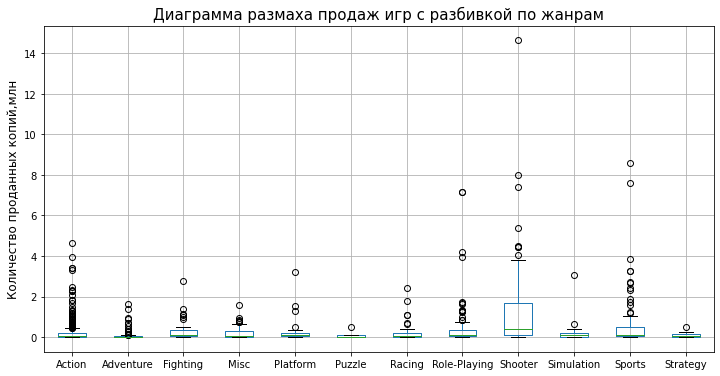

In [51]:
df_good_year.pivot_table(index= df_good_year.index, columns='genre',values='total_sales').boxplot(figsize=(12,6))
plt.title('Диаграмма размаха продаж игр с разбивкой по жанрам', fontsize=15)
plt.ylabel('Количество проданных копий,млн', fontsize=12);

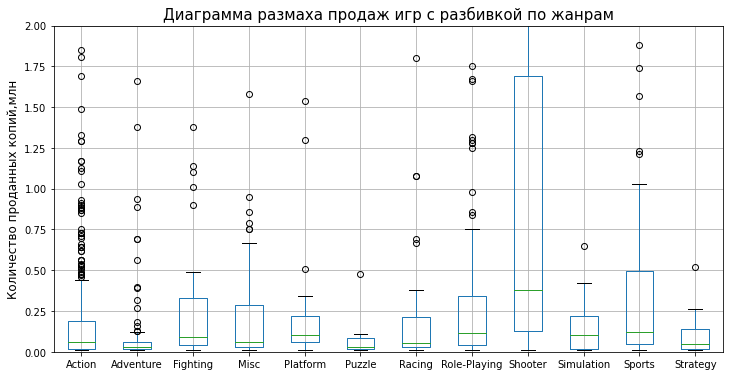

In [52]:
df_good_year.pivot_table(index= df_good_year.index, columns='genre',values='total_sales').boxplot(figsize=(12,6))
plt.ylim(0,2)
plt.title('Диаграмма размаха продаж игр с разбивкой по жанрам', fontsize=15)
plt.ylabel('Количество проданных копий,млн', fontsize=12);

In [53]:
df_good_year.pivot_table(index= df_good_year.index, columns='genre',values='total_sales').describe()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,431.000000,110.000000,37.000000,71.000000,28.000000,7.000000,42.000000,132.000000,81.000000,33.000000,107.000000,29.000000
mean,0.236961,0.108909,0.334324,0.199577,0.331429,0.102857,0.258571,0.422879,1.305309,0.228788,0.601215,0.102759
std,0.525858,0.254260,0.549695,0.286718,0.667387,0.170070,0.497342,1.028082,2.227297,0.531018,1.292693,0.115539
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.020000,0.020000,0.040000,0.030000,0.057500,0.015000,0.030000,0.040000,0.130000,0.020000,0.045000,0.020000
50%,0.060000,0.030000,0.090000,0.060000,0.100000,0.030000,0.055000,0.115000,0.380000,0.100000,0.120000,0.050000
75%,0.190000,0.060000,0.330000,0.290000,0.220000,0.085000,0.215000,0.340000,1.690000,0.220000,0.495000,0.140000
max,4.620000,1.660000,2.780000,1.580000,3.210000,0.480000,2.420000,7.170000,14.630000,3.050000,8.580000,0.520000


Вывод: диаграмма размаха по жанру "Shooter" особенно выделяется среди диаграмм других жанров. Именно жанр "Shooter" имеет наиболее длинный ряд успешно продающихся игр: от 130 000 до 1 690 000 проданных копий, в среднем - 380 000 проданных копий в данном жанре.

### Составим портрет пользователя каждого региона

#### Для пользователей каждого региона определим топ-5 самых популярных платформ

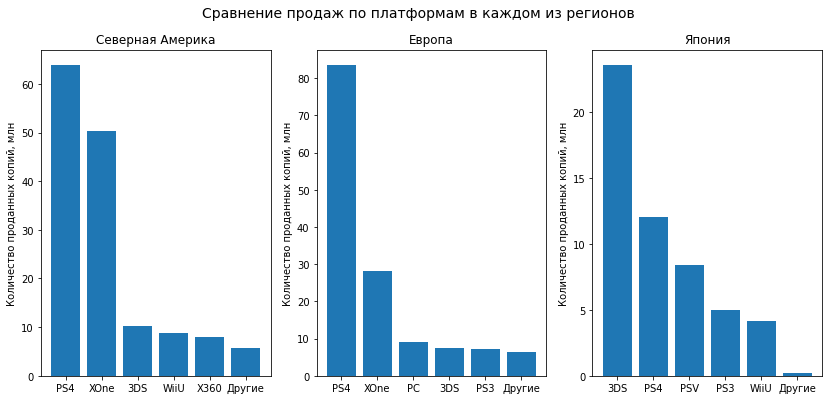

In [54]:
df_na_sales = df.query('year_of_release>=2015').groupby('platform')['na_sales'].sum().\
sort_values(ascending=False).to_frame().reset_index()
df_na_sales['platform'] = df_na_sales['platform'].\
where(df_na_sales['platform'].isin(df_na_sales['platform'].head().tolist()),'Другие')

df_eu_sales = df.query('year_of_release>=2015').groupby('platform')['eu_sales'].sum().\
sort_values(ascending=False).to_frame().reset_index()
df_eu_sales['platform'] = df_eu_sales['platform'].\
where(df_eu_sales['platform'].isin(df_eu_sales['platform'].head().tolist()),'Другие')

df_jp_sales = df.query('year_of_release>=2015').groupby('platform')['jp_sales'].sum().\
sort_values(ascending=False).to_frame().reset_index()
df_jp_sales['platform'] = df_jp_sales['platform'].\
where(df_jp_sales['platform'].isin(df_jp_sales['platform'].head().tolist()),'Другие')

fig = plt.figure(figsize=(14, 6))
fig.suptitle('Сравнение продаж по платформам в каждом из регионов', fontsize=14)


plt.subplot(1, 3, 1)
plt.bar(df_na_sales['platform'], df_na_sales['na_sales'])
plt.title('Северная Америка')
plt.ylabel('Количество проданных копий, млн')
plt.subplot(1, 3, 2)
plt.bar(df_eu_sales['platform'], df_eu_sales['eu_sales'])
plt.title('Европа')
plt.ylabel('Количество проданных копий, млн')
plt.subplot(1, 3, 3)
plt.bar(df_jp_sales['platform'], df_jp_sales['jp_sales'])
plt.title('Япония')
plt.ylabel('Количество проданных копий, млн')

plt.show()

В Северной Америке самыми популярными являются платформы PS4 и XOne, в Европе - PS4, в Японии предпочитают отечественную Nintendo 3DS.

#### Для пользователей каждого региона определим топ-5 самых популярных игровых жанров

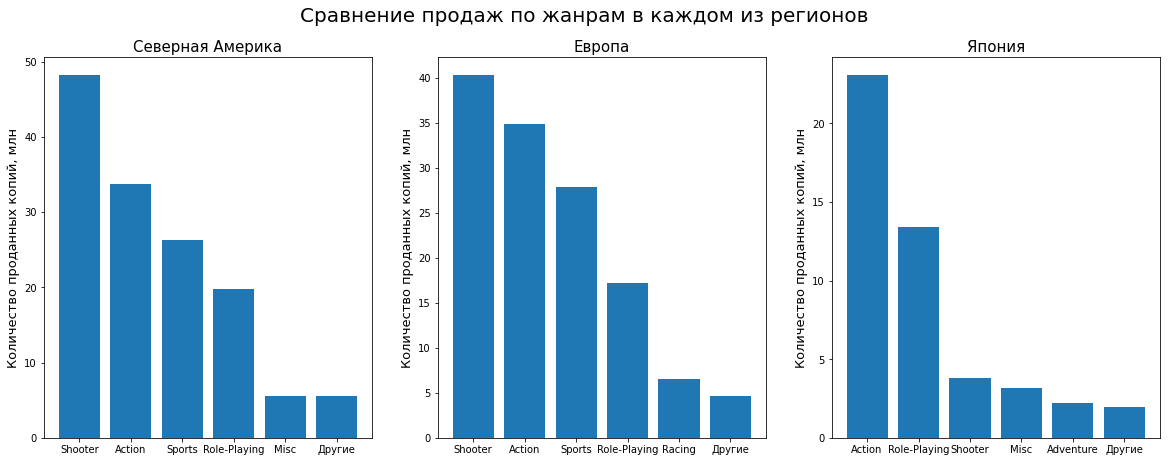

In [55]:
df_na_sales = df.query('year_of_release>=2015').groupby('genre')['na_sales'].sum().\
sort_values(ascending=False).to_frame().reset_index()
df_na_sales['genre'] = df_na_sales['genre'].\
where(df_na_sales['genre'].isin(df_na_sales['genre'].head().tolist()),'Другие')

df_eu_sales = df.query('year_of_release>=2015').groupby('genre')['eu_sales'].sum().\
sort_values(ascending=False).to_frame().reset_index()
df_eu_sales['genre'] = df_eu_sales['genre'].\
where(df_eu_sales['genre'].isin(df_eu_sales['genre'].head().tolist()),'Другие')

df_jp_sales = df.query('year_of_release>=2015').groupby('genre')['jp_sales'].sum().\
sort_values(ascending=False).to_frame().reset_index()
df_jp_sales['genre'] = df_jp_sales['genre'].\
where(df_jp_sales['genre'].isin(df_jp_sales['genre'].head().tolist()),'Другие')

fig = plt.figure(figsize=(20, 7))
fig.suptitle('Сравнение продаж по жанрам в каждом из регионов', fontsize=20)


plt.subplot(1, 3, 1)
plt.bar(df_na_sales['genre'], df_na_sales['na_sales'])
plt.title('Северная Америка',fontsize=15)
plt.ylabel('Количество проданных копий, млн',fontsize=13)
plt.subplot(1, 3, 2)
plt.bar(df_eu_sales['genre'], df_eu_sales['eu_sales'])
plt.title('Европа',fontsize=15)
plt.ylabel('Количество проданных копий, млн',fontsize=13)
plt.subplot(1, 3, 3)
plt.bar(df_jp_sales['genre'], df_jp_sales['jp_sales'])
plt.title('Япония',fontsize=15)
plt.ylabel('Количество проданных копий, млн',fontsize=13)

plt.show()

В Северной Америке пользователи предпочитают игры в жанре "Shooter", в Европе пользуются популярностью жанры "Shooter" и "Action", в Японии - "Action"

#### Оценим влияние рейтинга ESRB на продажи в каждом регионе

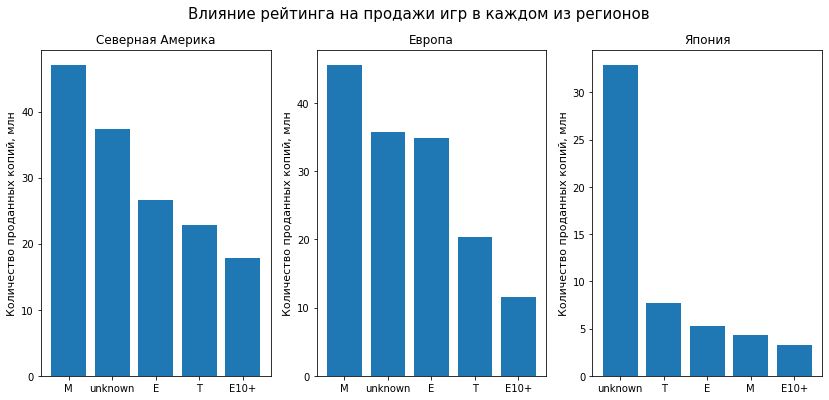

In [56]:
df_na_rating = df.query('year_of_release>=2015')\
    .groupby('rating')['na_sales'].sum().sort_values(ascending=False).to_frame().reset_index()
df_eu_rating = df.query('year_of_release>=2015')\
    .groupby('rating')['eu_sales'].sum().sort_values(ascending=False).to_frame().reset_index()
df_jp_rating = df.query('year_of_release>=2015')\
    .groupby('rating')['jp_sales'].sum().sort_values(ascending=False).to_frame().reset_index()


fig = plt.figure(figsize=(14, 6))
fig.suptitle('Влияние рейтинга на продажи игр в каждом из регионов', fontsize=15)


plt.subplot(1, 3, 1)
plt.bar(df_na_rating['rating'], df_na_rating['na_sales'])
plt.title('Северная Америка',fontsize=12)
plt.ylabel('Количество проданных копий, млн',fontsize=11)
plt.subplot(1, 3, 2)
plt.bar(df_eu_rating['rating'], df_eu_rating['eu_sales'])
plt.title('Европа',fontsize=12)
plt.ylabel('Количество проданных копий, млн',fontsize=11)
plt.subplot(1, 3, 3)
plt.bar(df_jp_rating['rating'], df_jp_rating['jp_sales'])
plt.title('Япония',fontsize=12)
plt.ylabel('Количество проданных копий, млн',fontsize=11)

plt.show()

В Северной Америке и в Европе предпочтения пользователей схожи: и там и там наиболее продаваемы игры с рейтингом ESRB "М"(от 17 лет). В Японии действует своя система рейтингов CERO, поэтому для оценки влияния рейтинга игр на прдажи в Японии необходимы дополнительные данные.

### Проверка гипотез

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
```
H_0: Пользовательский рейтинг платформы Xbox One = пользовательский рейтинг платформы PC 
H-a: Пользовательский рейтинг платформы Xbox One ≠ пользовательский рейтинг платформы PC 
alpha = 0.05 - уровень значимости (для проверки наших гипотез считаем такой уровень достаточным)
```

In [57]:
sample_1 = df.query('platform=="PC" and year_of_release>=2013')['user_score'].dropna()
sample_2 = df.query('platform=="XOne" and year_of_release>=2013')['user_score'].dropna()
# вызов метода для проверки гипотезы
results = st.ttest_ind(
    sample_2, 
    sample_1, equal_var = False) # предполагаем, что дисперсии генеральных совокупностей отличаются
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Значение p_value, равное 0.14759594013430463 означает, что с вероятностью примерно 14,75% разница между рейтингами по платформам будет случайным результатом. Это достаточно высокая вероятность, поэтому нулевую гипотезу отвергнуть не получится.

Проверка гипотезы: средние пользовательские рейтинги жанров *Action* и *Sports* разные.
```
H_0: Пользовательский рейтинг жанра Action = пользовательский рейтинг жанра Sports.
H-a: Пользовательский рейтинг жанра Action ≠ пользовательский рейтинг жанра Sports. 
alpha = 0.05
```

In [59]:
sample_1 = df.query('genre=="Action" and year_of_release>=2015')['user_score'].dropna()
sample_2 = df.query('genre=="Sports" and year_of_release>=2015')['user_score'].dropna()
# вызов метода для проверки гипотезы
results = st.ttest_ind(
    sample_2, 
    sample_1, equal_var = False) # предполагаем, что дисперсии генеральных совокупностей отличаются
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.97163549920592e-10
Отвергаем нулевую гипотезу


Значение p_value, равное 5.97163549920592e-10 означает, что с очень маленькой вероятностью разница между рейтингами в жанрах "Action" и "Sports" будет случайным результатом. А, значит, результат статистически значимый. Поэтому, в данном случае, нулевую гипотезу отвергаем в пользу альтернативной.

### Общий вывод

В процессе исследования была проведена предобработка данных:

- названия столбцов приведены к стандартному виду;
- изучены данные в столбцах и заполнены пропуски там, где это возможно;
- изменены типы данных на типы, соответствующие значениям в столбцах.

В результате исследования были получены следующие данные:
- потенциально прибыльными платформами в 2017 году будем считать PS4 и XOne в Северной Америке, PS4 в Европе и Nintendo 3DS в Японии
- игровой жанр "Shooter" имеет наиболее длинный ряд успешно продающихся игр: от 130 000 до 1 690 000 проданных копий, данный жанр наиболее продаваемый в Европе и Северной Америке, в Японии самым популярным является жанр "Action" 
- и в Северной Америке и в Европе самыми популярными играми являются игры с рейтингом ESRB "M"(от 17 лет), в Японии своя система рейтингов CERO, по которой необходимы дополнительные данные.

# 